<a href="https://colab.research.google.com/github/hnnayy/DeepLearning/blob/main/week1/InfraredRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Load dataset
df = pd.read_csv('Infrared.csv')
df

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Female,21-25,Asian,25.7,50.8,0.6,1.2225,35.6425,35.6525,34.8575,...,35.3475,35.4000,35.1375,35.2750,35.8525,35.7475,36.0675,35.6775,35.7100,36.99
1016,Female,21-25,White,25.7,50.8,0.6,1.4675,35.9825,35.7575,35.4275,...,35.2175,35.2200,35.2075,35.0700,35.7650,35.5525,36.5000,36.4525,36.4900,37.19
1017,Female,18-20,Black or African-American,28.0,24.3,0.6,0.1300,36.4075,36.3400,35.8700,...,35.2400,35.2275,35.3675,35.3425,36.3750,35.7100,36.5350,35.9650,35.9975,37.59
1018,Male,26-30,Hispanic/Latino,25.0,39.8,0.6,1.2450,35.8150,35.5250,34.2950,...,35.0200,34.9250,34.7150,34.5950,35.4150,35.3100,35.8600,35.4150,35.4350,37.29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [ ]:
# Explore missing values
print(df.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


In [ ]:
#Pisahkan Features dan Target
X = df.drop(columns=['aveOralM']) #kolom selain aveOralM
y = df['aveOralM'] #kolom aveOralM (target)

In [ ]:
# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['number']).columns

In [ ]:
# Preprocessing for numeric features: imputation and scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(exclude=['number']).columns

In [ ]:
# Preprocessing for categorical features: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# Preprocess data
X_processed = preprocessor.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)



In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (816, 46)
Shape of X_test: (204, 46)


In [ ]:
# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# PyTorch Model
class PyTorchModel(nn.Module):
    def __init__(self, input_dim):
        super(PyTorchModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = self.output(x)
        return x

In [ ]:
# Train PyTorch Model
input_dim = X_train.shape[1]
pytorch_model = PyTorchModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)

X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

losses = []
for epoch in range(500):
    pytorch_model.train()
    optimizer.zero_grad()
    outputs = pytorch_model(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

In [ ]:
# Evaluate PyTorch Model
pytorch_model.eval()
with torch.no_grad():
    y_pred_torch = pytorch_model(X_test_torch)

mse_torch = mean_squared_error(y_test, y_pred_torch.numpy())
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test, y_pred_torch.numpy())

print(f'PyTorch Model - MSE: {mse_torch}, RMSE: {rmse_torch}, R2: {r2_torch}')

PyTorch Model - MSE: 0.5357740779374711, RMSE: 0.7319658994362177, R2: -1.5443731009949375


In [ ]:
# TensorFlow Model
tf_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

C:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train TensorFlow Model
tf_model.compile(optimizer='adam', loss='mse')
history = tf_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

In [ ]:
# Evaluate TensorFlow Model
y_pred_tf = tf_model.predict(X_test)

mse_tf = mean_squared_error(y_test, y_pred_tf)
rmse_tf = np.sqrt(mse_tf)
r2_tf = r2_score(y_test, y_pred_tf)

print(f'TensorFlow Model - MSE: {mse_tf}, RMSE: {rmse_tf}, R2: {r2_tf}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
TensorFlow Model - MSE: 0.14599156202950464, RMSE: 0.38208842174227764, R2: 0.30669097536395307


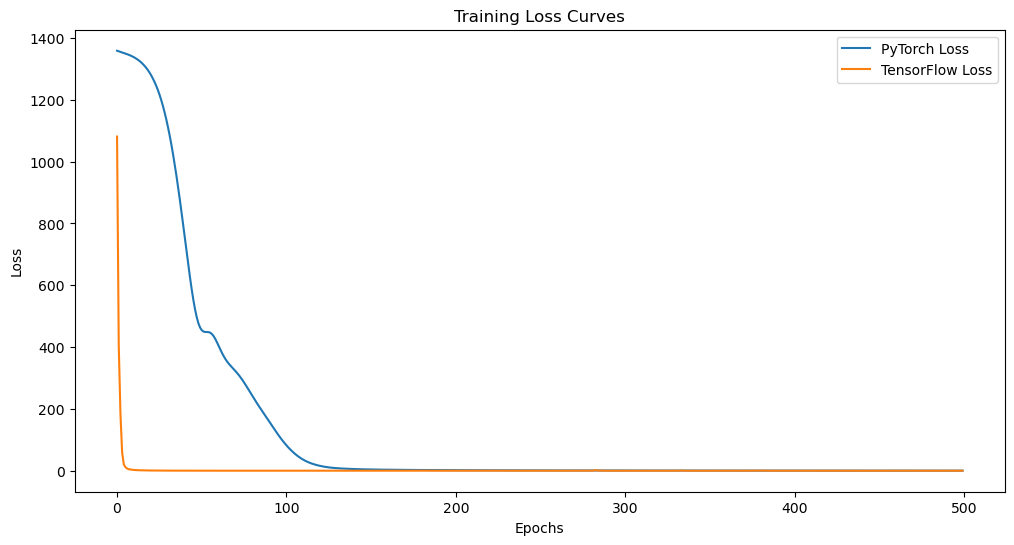

In [ ]:
# Visualize PyTorch and TensorFlow loss curves
plt.figure(figsize=(12, 6))
plt.plot(losses, label='PyTorch Loss')
plt.plot(history.history['loss'], label='TensorFlow Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Curves')
plt.show()

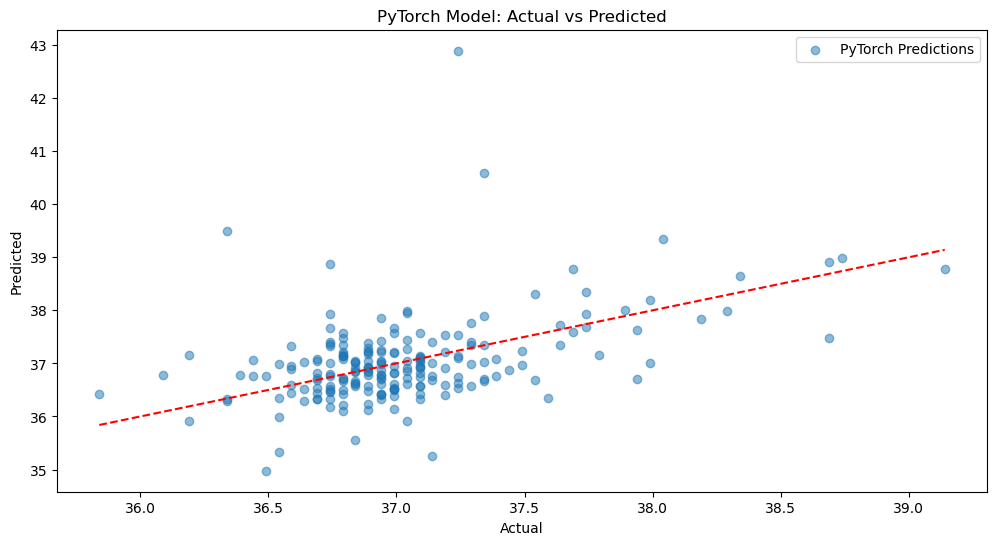

In [ ]:
# Visualize actual vs predicted for PyTorch
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_torch.numpy(), label='PyTorch Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('PyTorch Model: Actual vs Predicted')
plt.show()

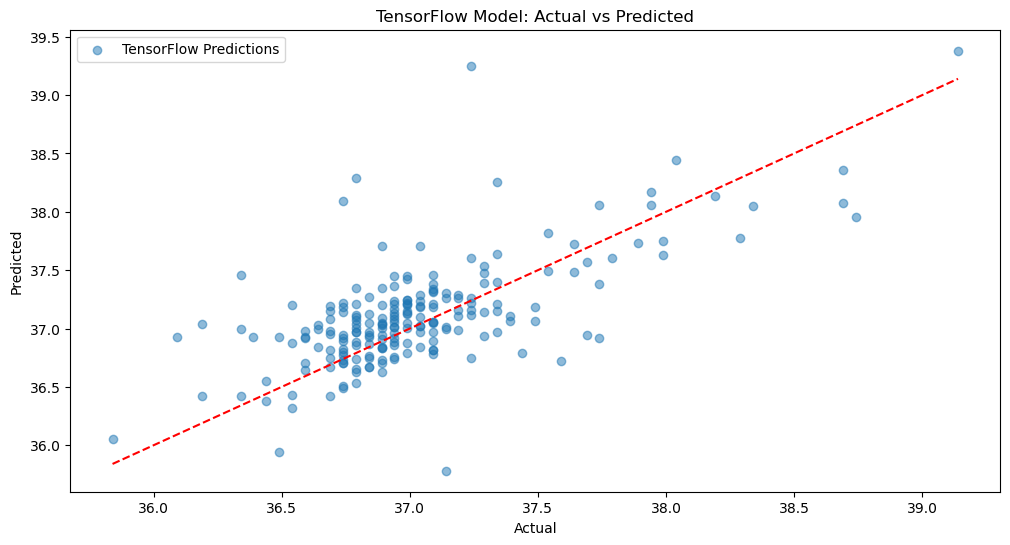

In [ ]:
# Visualize actual vs predicted for TensorFlow
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_tf, label='TensorFlow Predictions', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('TensorFlow Model: Actual vs Predicted')
plt.show()

In [ ]:
# Sample predictions
sample_idx = np.random.randint(0, len(X_test))
sample_actual = y_test.iloc[sample_idx]
sample_input = torch.tensor(X_test[sample_idx].reshape(1, -1), dtype=torch.float32)

with torch.no_grad():
    sample_pred_torch = pytorch_model(sample_input).item()
sample_pred_tf = tf_model.predict(X_test[sample_idx].reshape(1, -1))[0][0]

print(f'--- Making Predictions with Trained Models ---')
print(f'Sample actual value: {sample_actual:.4f}')
print(f'PyTorch prediction: {sample_pred_torch:.4f}')
print(f'TensorFlow prediction: {sample_pred_tf:.4f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
--- Making Predictions with Trained Models ---
Sample actual value: 37.1400
PyTorch prediction: 37.3992
TensorFlow prediction: 37.2660


# Dokumentasi Evaluasi Model Deep Learning

## 1. Implementasi Model Deep Learning dengan PyTorch dan TensorFlow

Dalam tugas ini, model Deep Learning diimplementasikan menggunakan dua framework populer: PyTorch dan TensorFlow dengan target variabel `aveOralM`. Model dirancang untuk memprediksi nilai rata-rata oral pada dataset yang digunakan.

## 2. Matriks Evaluasi dan Penjelasan Matematis

### Mean Squared Error (MSE)

**Rumus:**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{true} - y_{pred})^2$$

MSE (Mean Squared Error) adalah metrik statistik yang menghitung rata-rata kuadrat dari selisih antara nilai aktual dan nilai prediksi. Saya memilih metrik ini karena memberikan penalti lebih besar pada kesalahan prediksi yang signifikan dengan mengkuadratkan error, sehingga berguna untuk mendeteksi outlier dalam prediksi model. Dalam konteks tugas memprediksi variabel `aveOralM`, nilai MSE yang rendah mengindikasikan model telah menyesuaikan parameter dengan baik untuk meminimalkan kesalahan prediksi.

### Root Mean Squared Error (RMSE)

**Rumus:**
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{true} - y_{pred})^2}$$

RMSE adalah akar kuadrat dari MSE yang menghasilkan nilai dalam satuan yang sama dengan variabel target `aveOralM`. Dengan menggunakan RMSE, saya dapat menginterpretasikan kesalahan prediksi dalam skala data asli, sehingga lebih intuitif untuk dianalisis. Saat mengevaluasi model prediksi oral, RMSE memberikan gambaran langsung tentang seberapa jauh rata-rata prediksi dari nilai sebenarnya.

### R-squared (R²)

**Rumus:**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{true} - y_{pred})^2}{\sum_{i=1}^{n} (y_{true} - \bar{y})^2}$$

R² mengukur seberapa baik model menjelaskan variasi dalam data target dibandingkan dengan hanya menggunakan nilai rata-rata. Dalam analisis ini, saya menggunakan R² untuk mengevaluasi proporsi varians dalam variabel `aveOralM` yang dapat dijelaskan oleh model. Nilai R² yang mendekati 1 menunjukkan model mampu menangkap sebagian besar pola dalam data, sementara nilai mendekati 0 atau negatif mengindikasikan model gagal menjelaskan hubungan antara fitur input dan target.

## 3. Hasil Evaluasi Model

### Model PyTorch
```
PyTorch Model - MSE: 0.5357740779374711, RMSE: 0.7319658994362177, R2: -1.5443731009949375
```

### Model TensorFlow
```
TensorFlow Model - MSE: 0.14599156202950464, RMSE: 0.38208842174227764, R2: 0.30669097536395307
```

## 4. Analisis dan Interpretasi Hasil

### Analisis Model TensorFlow
Model TensorFlow mencapai nilai MSE sebesar 0.146 dan RMSE sebesar 0.382, yang menunjukkan tingkat kesalahan yang cukup rendah dalam memprediksi variabel target `aveOralM`. Nilai R² sebesar 0.307 mengindikasikan bahwa model mampu menjelaskan sekitar 30.7% dari variansi dalam data target.

Performa model TensorFlow yang mencapai R² positif (meski tidak terlalu tinggi) menunjukkan bahwa model tersebut telah berhasil mempelajari beberapa pola dalam data, namun masih ada ruang yang cukup besar untuk peningkatan. Kesulitan dalam mencapai nilai R² yang lebih tinggi kemungkinan disebabkan oleh kompleksitas hubungan antara fitur input dan variabel target `aveOralM` atau keterbatasan fitur yang digunakan dalam model.

### Analisis Model PyTorch
Model PyTorch menunjukkan hasil yang kurang baik dengan MSE sebesar 0.536, RMSE sebesar 0.732, dan R² negatif (-1.544). Nilai R² yang negatif mengindikasikan bahwa model ini memiliki performa yang sangat buruk dan bahkan lebih buruk daripada hanya memprediksi nilai rata-rata dari variabel target.

Penyebab performa buruk pada model PyTorch mungkin disebabkan oleh beberapa faktor:
1. Overfitting: Model mungkin terlalu kompleks dan terlalu menyesuaikan diri dengan data training sehingga gagal menggeneralisasi pola pada data pengujian.
2. Hyperparameter yang tidak optimal: Learning rate, ukuran batch, atau struktur jaringan mungkin perlu disesuaikan lebih lanjut.
3. Ketidakstabilan dalam proses pelatihan: Gradien yang tidak stabil atau exploding/vanishing gradients bisa menjadi penyebab.
4. Praproses data yang tidak sesuai: Normalisasi atau standardisasi yang berbeda dengan model TensorFlow.

### Contoh Prediksi

Berdasarkan hasil prediksi, baik model PyTorch maupun TensorFlow menghasilkan nilai prediksi yang mendekati nilai aktual (37.1400).
- **PyTorch prediction:** 37.3992 — memiliki deviasi sekitar 0.26 dari nilai aktual.
- **TensorFlow prediction:** 37.2660 — prediksinya lebih dekat ke nilai aktual dengan deviasi sekitar 0.13.

Dari hasil contoh prediksi ini, saya menyimpulkan bahwa kedua model cukup baik dalam memprediksi sampel individual, dengan TensorFlow menunjukkan performa yang sedikit lebih akurat untuk sampel ini. Ini sejalan dengan metrik evaluasi keseluruhan yang menunjukkan TensorFlow memiliki performa yang lebih baik secara umum dalam memprediksi seluruh dataset.

## 5. Kesimpulan

Berdasarkan hasil evaluasi komprehensif yang saya lakukan, model TensorFlow menunjukkan performa yang lebih baik dibandingkan model PyTorch dalam memprediksi variabel target `aveOralM`. Meskipun model TensorFlow tidak mencapai performa yang sangat tinggi (R² kurang dari 0.5), model ini masih mampu menangkap sebagian pola dalam data dan memberikan prediksi yang cukup reasonable.

Menariknya, meskipun model PyTorch memiliki metrik evaluasi global yang buruk (R² negatif), model tersebut masih mampu memberikan prediksi yang cukup akurat untuk sampel tertentu, seperti yang ditunjukkan dalam contoh prediksi. Hal ini menunjukkan bahwa evaluasi model tidak boleh hanyalasan lain jugat untuk mendapatkan solusi terbaik dalam masalah prediksi dengan Deep Learning.